## RAINFALL PREDICTION ANALYSIS

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Collection and details

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Rainfall.csv")
df

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [3]:
df.shape

(366, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0


In [6]:
for i in df.columns:
    print(i)
    print(df[i].nunique())
    print('________________________________________')

day
31
________________________________________
pressure 
188
________________________________________
maxtemp
174
________________________________________
temparature
158
________________________________________
mintemp
157
________________________________________
dewpoint
158
________________________________________
humidity 
49
________________________________________
cloud 
79
________________________________________
rainfall
2
________________________________________
sunshine
104
________________________________________
winddirection
31
________________________________________
windspeed
223
________________________________________


In [7]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

### Data Cleaning

In [8]:
df.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [9]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [10]:
df.columns = df.columns.str.strip()  

In [11]:
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

### Checking for Missing value

In [12]:
df['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [13]:
df['windspeed'].unique()

array([26.3, 15.3, 14.2, 16.9, 13.7, 14.5, 21.5, 14.3, 39.3, 37.7, 23.3,
       23.9, 24.4, 33.2, 37.5, 40. , 23.4, 28.4, 38. , 50.6, 26.2, 35.3,
       55.5, 59.5, 28.7, 21.3, 29.6, 28.8, 25. , 21.2, 43.1, 31.9, 27.3,
        9.1, 44.7, 20.5, 16.7, 17.2, 22. , 15.8, 13.9, 10.2, 33.5, 23.5,
       19.2, 18.6, 22.2, 19.3, 28. , 20.4, 15.2,  9.2, 34.2, 27.1, 14.7,
       15.4, 13.3,  6.6, 13.8, 15.1, 39.7, 36. , 22.8, 26.7, 26.5, 13.1,
       12.5, 38.3, 42. , 19.4, 13.4, 14.6, 26.9, 14.8,  4.5,  8.3,  8. ,
       20. , 10. , 17.3, 31.8, 29.8, 11.2, 16. , 19.6, 20.9,  7.3, 11.1,
       13. ,  8.5, 24.2, 20.2, 30.5, 27. , 23.7, 11.8, 15.5, 12.1,  9.5,
       16.3, 12. , 26. , 28.6, 24.9, 28.3, 15.7, 21.9, 39.5, 30.3, 26.4,
       22.3, 25.9, 11.3,  7.9,  7.4, 16.2, 34.8, 32.5, 24. , 19. , 25.2,
       31.7, 27.4, 20.8,  9.8, 12.6,  nan, 24.3, 30. , 29.3, 23.2, 12.8,
       19.8, 12.4, 10.9,  9.6,  9. , 11.9, 26.1, 25.1, 33. , 22.5, 24.8,
       18.8, 22.4, 22.6, 12.3, 21.6, 17.5, 16.1, 14

In [14]:
df['winddirection'] = df['winddirection'].fillna(df['winddirection'].median())
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].median())

In [15]:
df.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

### Analysis & Visualization

In [16]:
df['rainfall'].value_counts()

rainfall
yes    249
no     117
Name: count, dtype: int64

#### 1) Rainfall Rate

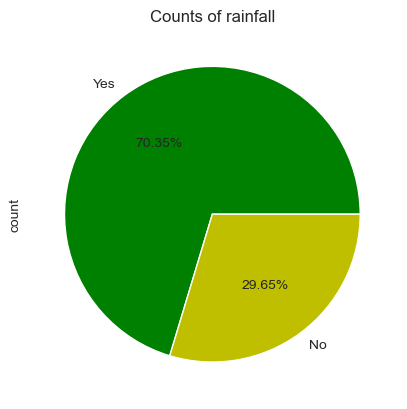

In [83]:
c = ["g","y"]
df['rainfall'].value_counts().plot.pie(autopct='%.2f%%',radius=1,labels = ['Yes','No'],colors=c)
plt.title('Counts of rainfall')
plt.show()

In [18]:
df.groupby('rainfall').mean()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,,
no,15.623932,1014.576923,27.070940,24.053846,21.957265,18.766667,73.000000,51.256410,7.586325,103.076923,19.275214
yes,15.819277,1013.350602,25.777912,23.603213,21.865060,20.563454,83.550201,80.465863,2.931325,100.642570,22.595582


In [19]:
df.replace({'yes':1, 'no':0}, inplace=True)

In [20]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


#### 2) Distribution of outliers

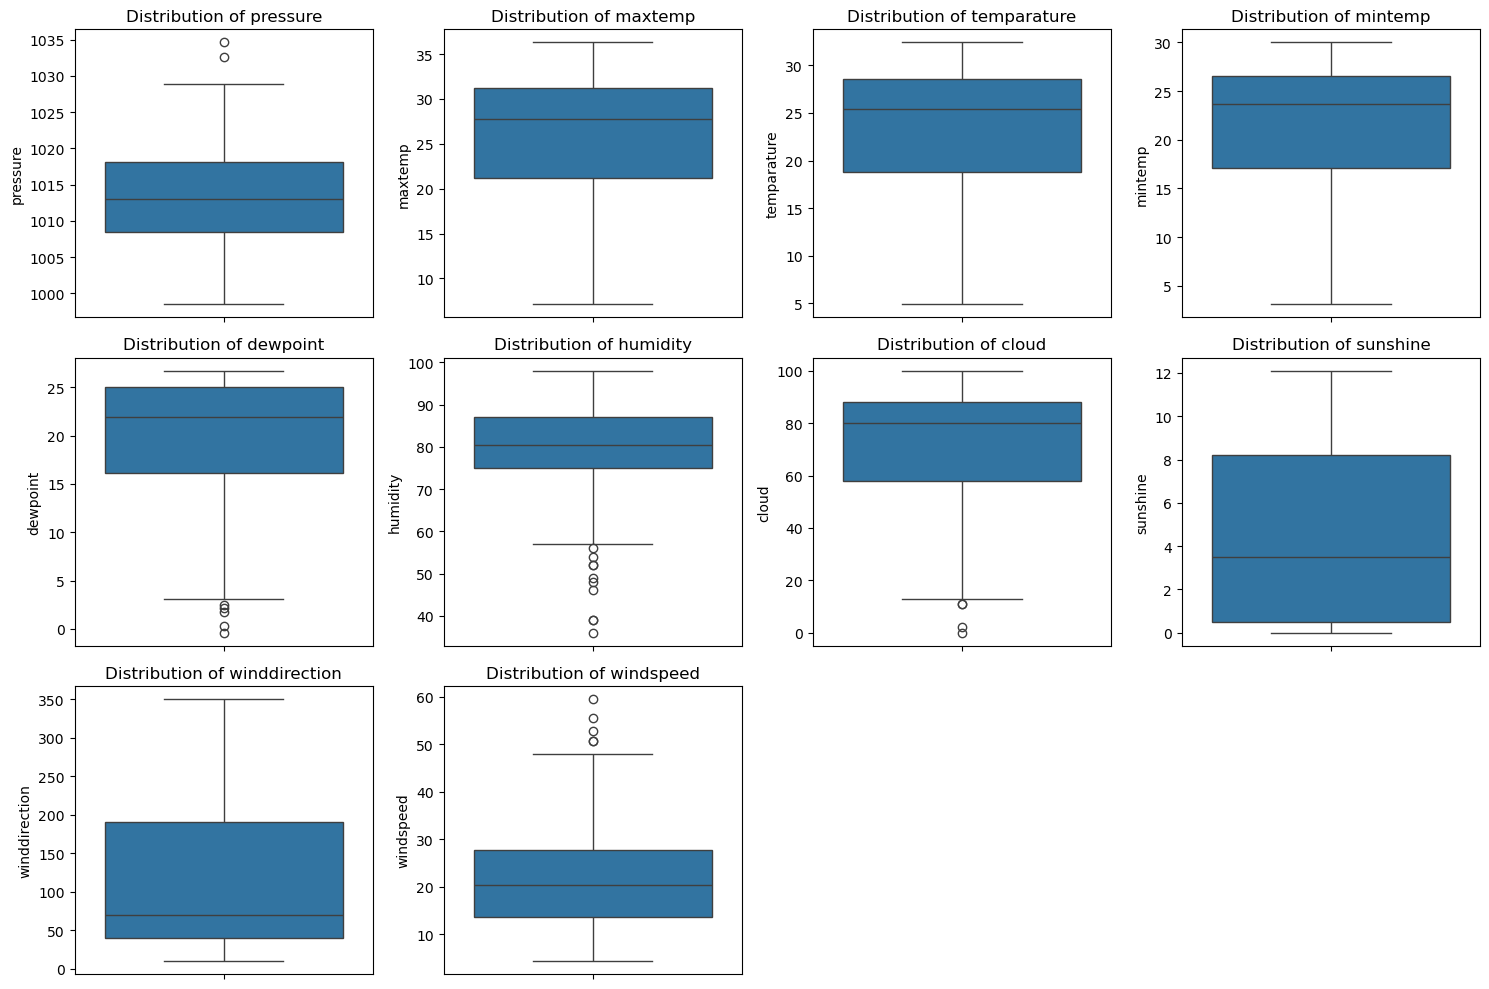

In [21]:
columns = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud','sunshine', 'winddirection',
       'windspeed']
plt.figure(figsize = (15,10))

for i,column in enumerate(columns,1):
    plt.subplot(3,4,i)
    sns.boxplot(df[column])
    plt.title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

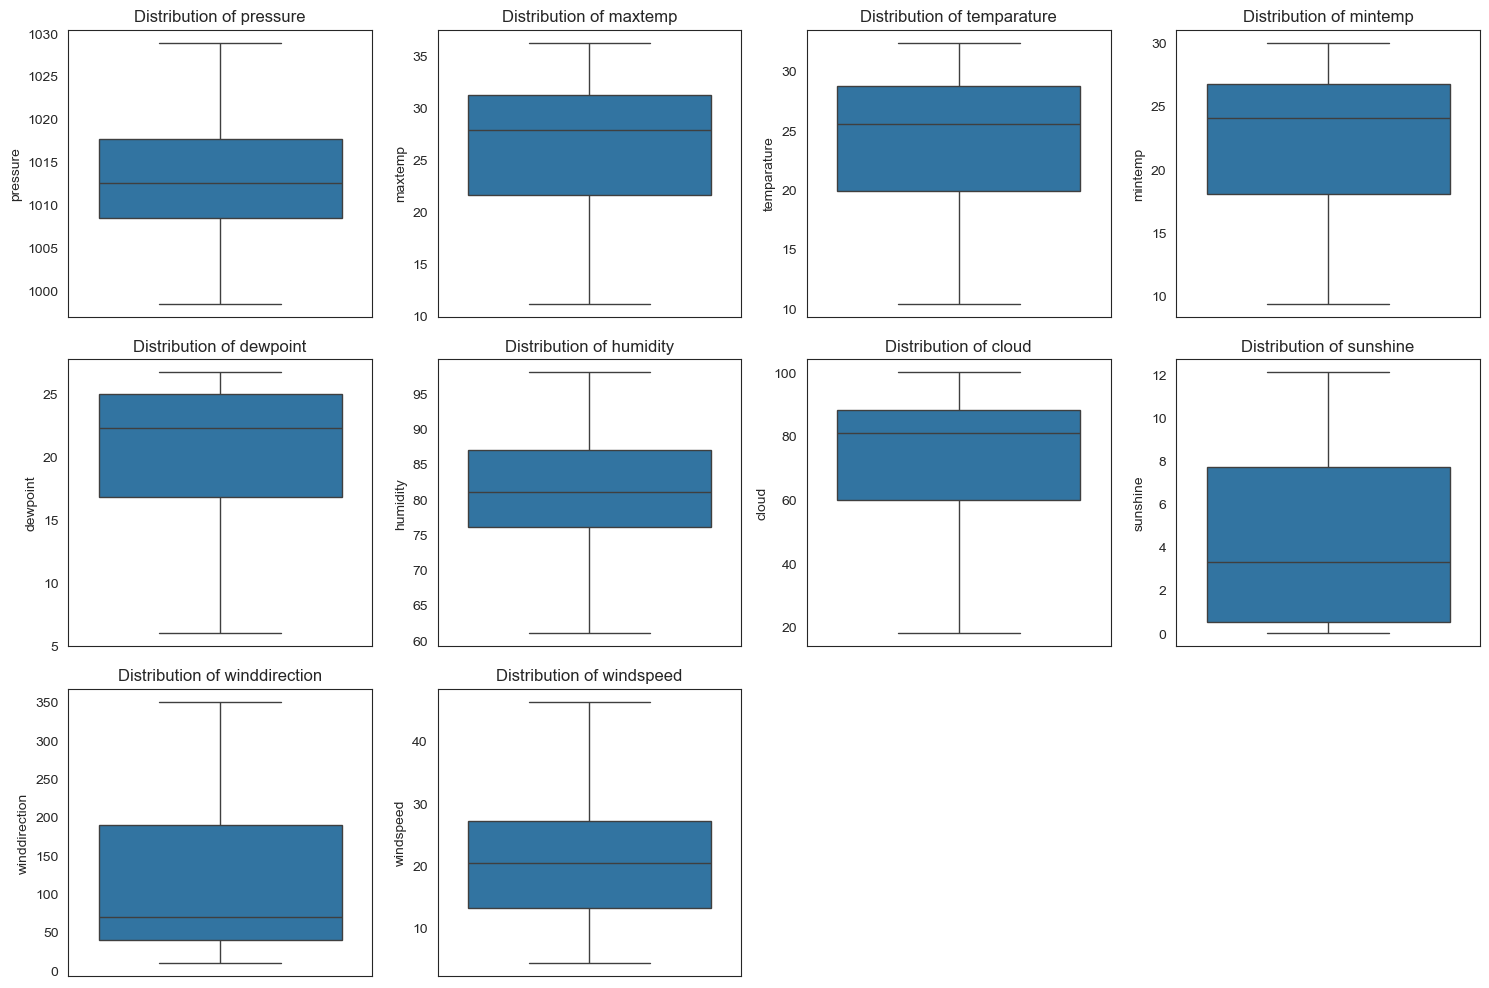

In [70]:
columns = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
           'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


for column in columns:
    df = remove_outliers(df, column)

 
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[column])
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


#### 3) Daily Rainfall Trend

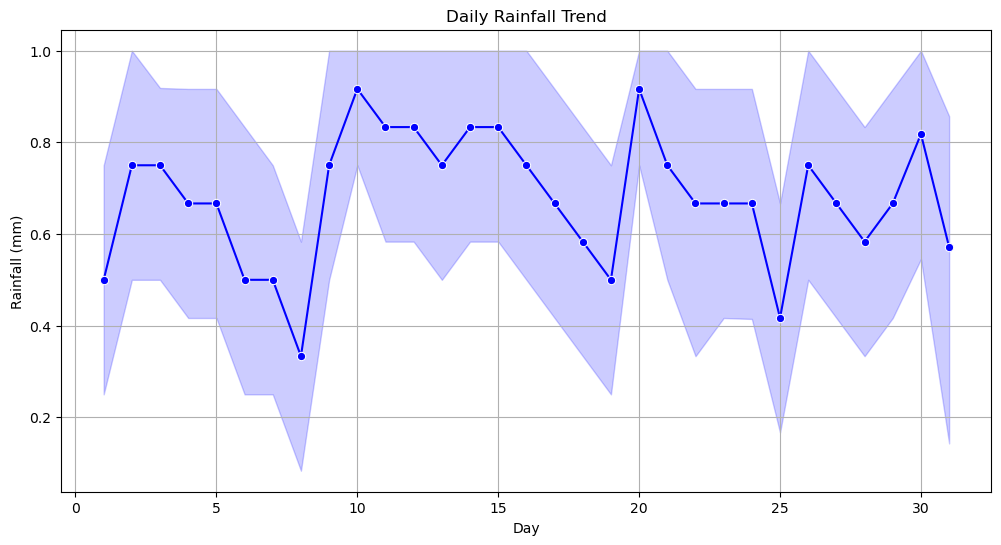

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='day', y='rainfall',marker='o', color='b')
plt.title("Daily Rainfall Trend")
plt.xlabel("Day")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.show()

### 4) Wind Direction w.r.t Rainfall

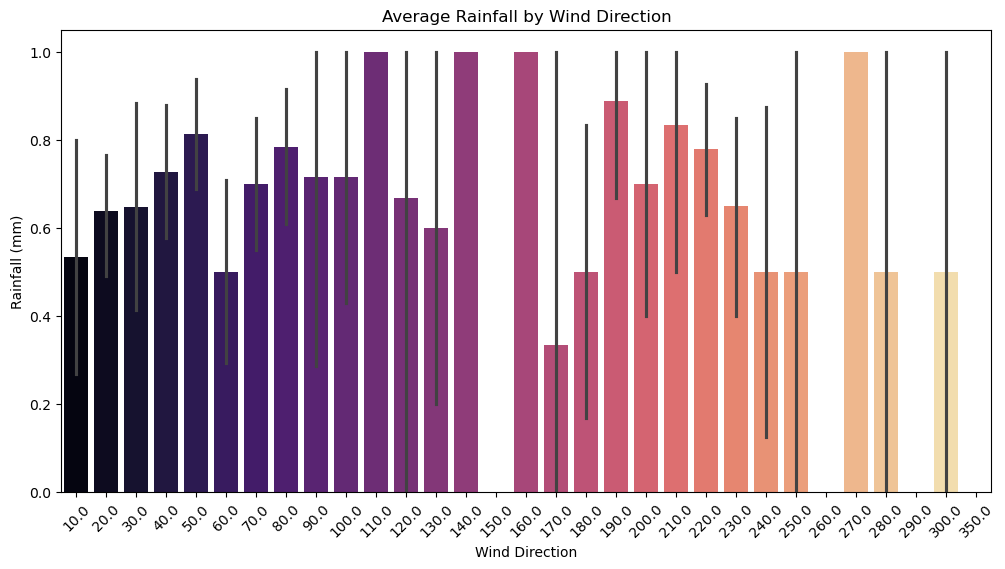

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='winddirection', y='rainfall',palette="magma")
plt.title("Average Rainfall by Wind Direction")
plt.xlabel("Wind Direction")
plt.ylabel("Rainfall (mm)")
plt.xticks(rotation=45)
plt.show()

#### 5) Rainfall w.r.t Cloud Cover

In [24]:
mean_cloudcover = df['cloud'].mean()

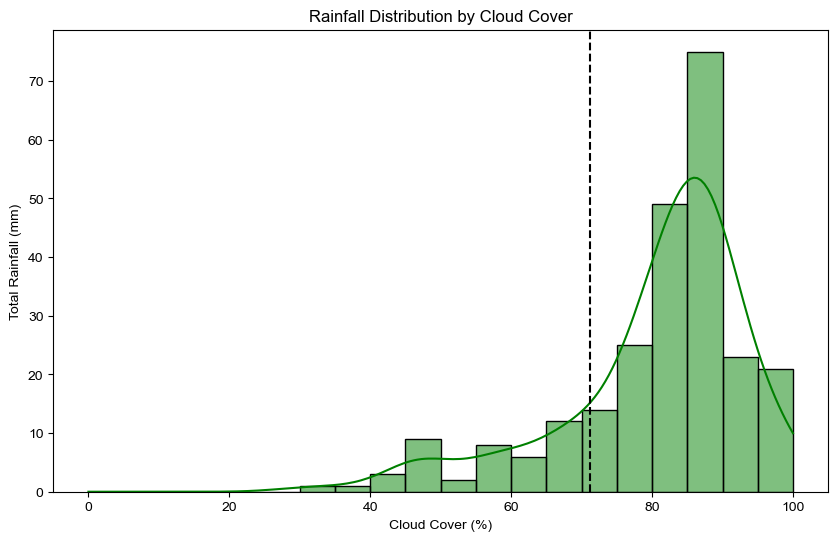

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='cloud', weights='rainfall', bins=20, kde=True, color='green')
sns.set_style('white')
plt.axvline(x=mean_cloudcover, color='black', linestyle='--', label=f'Mean Age: {mean_cloudcover:.2f}')
plt.title("Rainfall Distribution by Cloud Cover")
plt.xlabel("Cloud Cover (%)")
plt.ylabel("Total Rainfall (mm)")
plt.show()

###  CORRELATION OF DEPENDENT AND INDEPENDENT VARIABLE

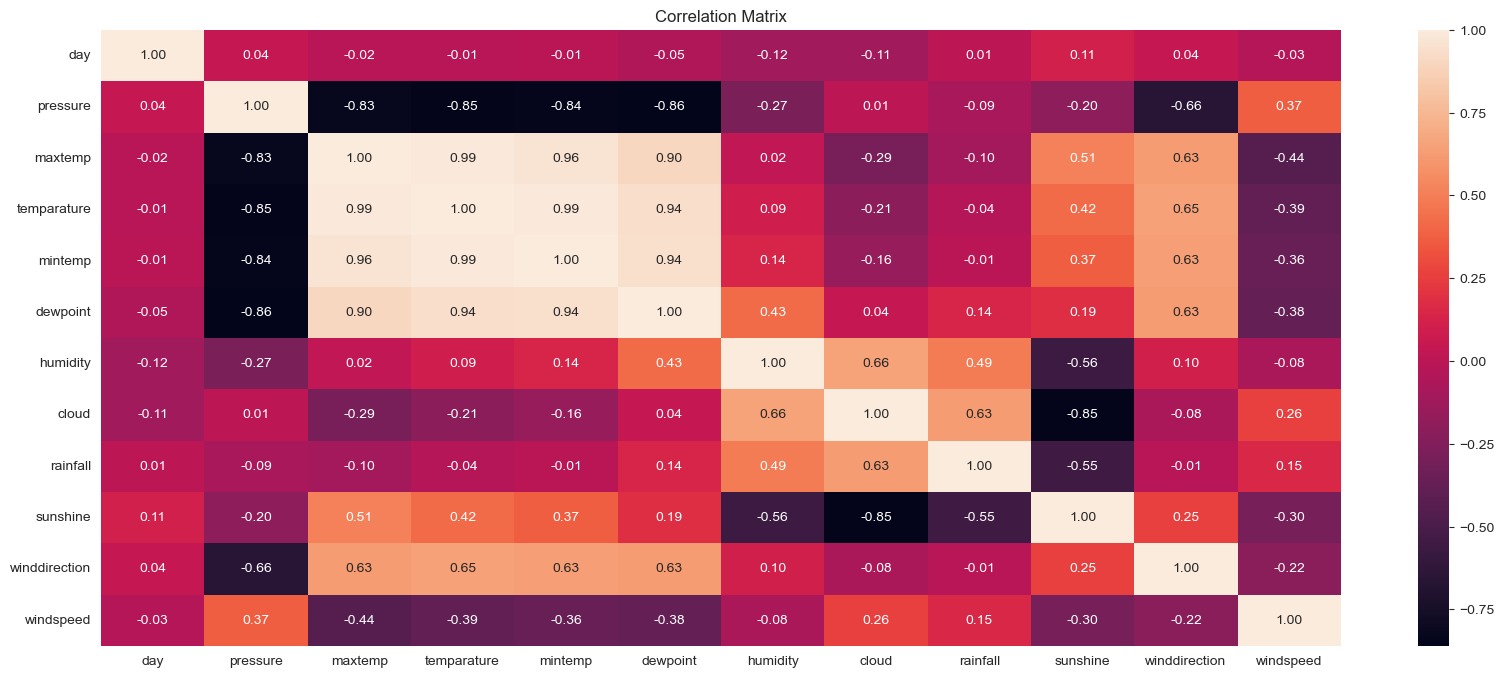

In [26]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot = True,fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

In [27]:
df = df.drop(columns = ['day'])

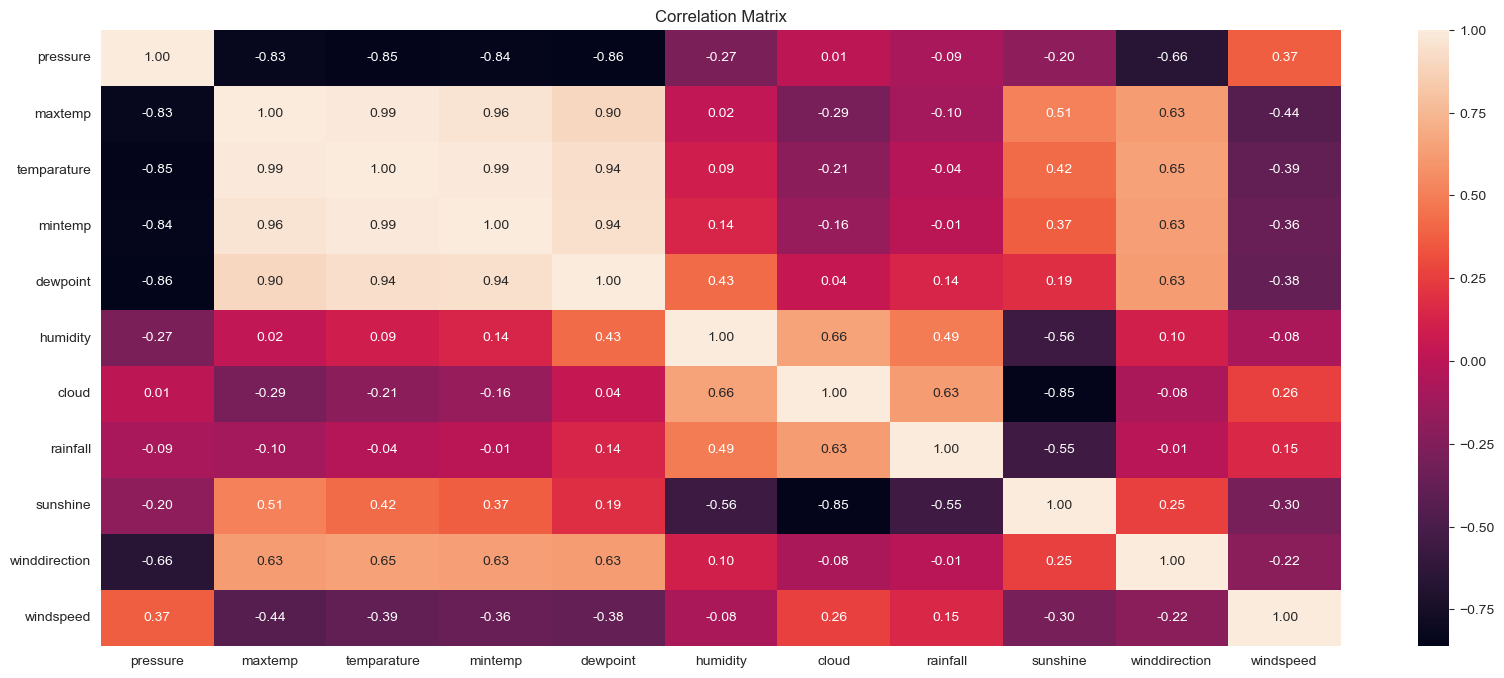

In [28]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot = True,fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

### Feature and Target

#### Features

In [30]:
x = df.drop(['rainfall'], axis=1)
x

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,1.2,20.0,20.9


#### Target

In [31]:
y = df.iloc[:,7]
y

0      1
1      1
2      1
3      1
4      1
      ..
361    1
362    1
363    1
364    1
365    0
Name: rainfall, Length: 344, dtype: int64

### Sampling

In [32]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='auto') 
x,y=smote.fit_resample(x,y)
y.value_counts()

rainfall
1    242
0    242
Name: count, dtype: int64

### Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x, y,test_size=0.2,random_state=42)

### Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Building

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [36]:
logreg = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ab = AdaBoostClassifier()

#### Function for model

In [37]:
from sklearn.metrics import classification_report,accuracy_score
def mymodel(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("Accuracy Score :",accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    train = model.score(X_train,y_train)
    test = model.score(X_test,y_test)
    print("Training Performance :",train)
    print("Testing Performance :",test)
    return model

##### Logistic Regression

In [38]:
mymodel(logreg)

Accuracy Score : 0.8144329896907216
              precision    recall  f1-score   support

           0       0.90      0.73      0.81        52
           1       0.75      0.91      0.82        45

    accuracy                           0.81        97
   macro avg       0.83      0.82      0.81        97
weighted avg       0.83      0.81      0.81        97

Training Performance : 0.7751937984496124
Testing Performance : 0.8144329896907216


LogisticRegression()

#### Solver Tuning 

#### liblinear

In [39]:
logreg = LogisticRegression(solver = 'liblinear')
mymodel(logreg)

Accuracy Score : 0.8144329896907216
              precision    recall  f1-score   support

           0       0.90      0.73      0.81        52
           1       0.75      0.91      0.82        45

    accuracy                           0.81        97
   macro avg       0.83      0.82      0.81        97
weighted avg       0.83      0.81      0.81        97

Training Performance : 0.7751937984496124
Testing Performance : 0.8144329896907216


LogisticRegression(solver='liblinear')

#### saga

In [40]:
logreg = LogisticRegression(solver = 'saga')
mymodel(logreg)

Accuracy Score : 0.8144329896907216
              precision    recall  f1-score   support

           0       0.90      0.73      0.81        52
           1       0.75      0.91      0.82        45

    accuracy                           0.81        97
   macro avg       0.83      0.82      0.81        97
weighted avg       0.83      0.81      0.81        97

Training Performance : 0.7751937984496124
Testing Performance : 0.8144329896907216


LogisticRegression(solver='saga')

#### newton-cholesky

In [41]:
logreg = LogisticRegression(solver = 'newton-cholesky')
mymodel(logreg)

Accuracy Score : 0.8144329896907216
              precision    recall  f1-score   support

           0       0.90      0.73      0.81        52
           1       0.75      0.91      0.82        45

    accuracy                           0.81        97
   macro avg       0.83      0.82      0.81        97
weighted avg       0.83      0.81      0.81        97

Training Performance : 0.7751937984496124
Testing Performance : 0.8144329896907216


LogisticRegression(solver='newton-cholesky')

#### newton-cg

In [42]:
logreg = LogisticRegression(solver = 'newton-cg')
mymodel(logreg)

Accuracy Score : 0.8144329896907216
              precision    recall  f1-score   support

           0       0.90      0.73      0.81        52
           1       0.75      0.91      0.82        45

    accuracy                           0.81        97
   macro avg       0.83      0.82      0.81        97
weighted avg       0.83      0.81      0.81        97

Training Performance : 0.7751937984496124
Testing Performance : 0.8144329896907216


LogisticRegression(solver='newton-cg')

#### lbfgs

In [43]:
logreg = LogisticRegression(solver = 'lbfgs')
mymodel(logreg)

Accuracy Score : 0.8144329896907216
              precision    recall  f1-score   support

           0       0.90      0.73      0.81        52
           1       0.75      0.91      0.82        45

    accuracy                           0.81        97
   macro avg       0.83      0.82      0.81        97
weighted avg       0.83      0.81      0.81        97

Training Performance : 0.7751937984496124
Testing Performance : 0.8144329896907216


LogisticRegression()

##### Support Vector

##### Kernal={'linear', 'poly', 'rbf', 'sigmoid'} 

In [44]:
mymodel(svm)

Accuracy Score : 0.8041237113402062
              precision    recall  f1-score   support

           0       0.90      0.71      0.80        52
           1       0.73      0.91      0.81        45

    accuracy                           0.80        97
   macro avg       0.82      0.81      0.80        97
weighted avg       0.82      0.80      0.80        97

Training Performance : 0.7855297157622739
Testing Performance : 0.8041237113402062


SVC()

In [45]:
svm1=SVC(kernel='rbf')

In [46]:
mymodel(svm1)

Accuracy Score : 0.8041237113402062
              precision    recall  f1-score   support

           0       0.90      0.71      0.80        52
           1       0.73      0.91      0.81        45

    accuracy                           0.80        97
   macro avg       0.82      0.81      0.80        97
weighted avg       0.82      0.80      0.80        97

Training Performance : 0.7855297157622739
Testing Performance : 0.8041237113402062


SVC()

In [47]:
svm2=SVC(kernel='linear')

In [48]:
mymodel(svm2)

Accuracy Score : 0.8041237113402062
              precision    recall  f1-score   support

           0       0.90      0.71      0.80        52
           1       0.73      0.91      0.81        45

    accuracy                           0.80        97
   macro avg       0.82      0.81      0.80        97
weighted avg       0.82      0.80      0.80        97

Training Performance : 0.7751937984496124
Testing Performance : 0.8041237113402062


SVC(kernel='linear')

In [49]:
svm3=SVC(kernel='poly')
mymodel(svm)

Accuracy Score : 0.8041237113402062
              precision    recall  f1-score   support

           0       0.90      0.71      0.80        52
           1       0.73      0.91      0.81        45

    accuracy                           0.80        97
   macro avg       0.82      0.81      0.80        97
weighted avg       0.82      0.80      0.80        97

Training Performance : 0.7855297157622739
Testing Performance : 0.8041237113402062


SVC()

In [50]:
svm4=SVC(kernel='sigmoid')
mymodel(svm)

Accuracy Score : 0.8041237113402062
              precision    recall  f1-score   support

           0       0.90      0.71      0.80        52
           1       0.73      0.91      0.81        45

    accuracy                           0.80        97
   macro avg       0.82      0.81      0.80        97
weighted avg       0.82      0.80      0.80        97

Training Performance : 0.7855297157622739
Testing Performance : 0.8041237113402062


SVC()

##### K-Neighbours Classifier

In [51]:
mymodel(knn)

Accuracy Score : 0.7731958762886598
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        52
           1       0.78      0.71      0.74        45

    accuracy                           0.77        97
   macro avg       0.77      0.77      0.77        97
weighted avg       0.77      0.77      0.77        97

Training Performance : 0.8475452196382429
Testing Performance : 0.7731958762886598


KNeighborsClassifier()

##### Decision Tree

In [52]:
mymodel(dt)

Accuracy Score : 0.7938144329896907
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        52
           1       0.74      0.87      0.80        45

    accuracy                           0.79        97
   macro avg       0.80      0.80      0.79        97
weighted avg       0.80      0.79      0.79        97

Training Performance : 1.0
Testing Performance : 0.7938144329896907


DecisionTreeClassifier()

#### Hypertunning in parameter in dt

In [53]:
for i in range(1,51):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(X_train,y_train)
    y_pred=dt1.predict(X_test)
    ac=accuracy_score(y_test,y_pred)
    print(f'Max depth={i} accuracy={ac}')

Max depth=1 accuracy=0.7835051546391752
Max depth=2 accuracy=0.7628865979381443
Max depth=3 accuracy=0.7628865979381443
Max depth=4 accuracy=0.7731958762886598
Max depth=5 accuracy=0.7422680412371134
Max depth=6 accuracy=0.7216494845360825
Max depth=7 accuracy=0.7525773195876289
Max depth=8 accuracy=0.7628865979381443
Max depth=9 accuracy=0.7422680412371134
Max depth=10 accuracy=0.7731958762886598
Max depth=11 accuracy=0.7525773195876289
Max depth=12 accuracy=0.711340206185567
Max depth=13 accuracy=0.7835051546391752
Max depth=14 accuracy=0.7422680412371134
Max depth=15 accuracy=0.7628865979381443
Max depth=16 accuracy=0.7422680412371134
Max depth=17 accuracy=0.7216494845360825
Max depth=18 accuracy=0.7422680412371134
Max depth=19 accuracy=0.7938144329896907
Max depth=20 accuracy=0.7835051546391752
Max depth=21 accuracy=0.7835051546391752
Max depth=22 accuracy=0.7422680412371134
Max depth=23 accuracy=0.7422680412371134
Max depth=24 accuracy=0.7422680412371134
Max depth=25 accuracy=0.74

In [54]:
dt1=DecisionTreeClassifier(max_depth = 14)
mymodel(dt1)

Accuracy Score : 0.7525773195876289
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        52
           1       0.71      0.78      0.74        45

    accuracy                           0.75        97
   macro avg       0.75      0.75      0.75        97
weighted avg       0.76      0.75      0.75        97

Training Performance : 0.9974160206718347
Testing Performance : 0.7525773195876289


DecisionTreeClassifier(max_depth=14)

#### Tuning min samples split

In [55]:
for i in range(2,111):
    dt2=DecisionTreeClassifier(min_samples_split=i)
    dt2.fit(X_train,y_train)
    y_pred=dt2.predict(X_test)
    ac=accuracy_score(y_test,y_pred)
    print(f'Min sample split={i} accuracy={ac}')

Min sample split=2 accuracy=0.7525773195876289
Min sample split=3 accuracy=0.7525773195876289
Min sample split=4 accuracy=0.7938144329896907
Min sample split=5 accuracy=0.7731958762886598
Min sample split=6 accuracy=0.7525773195876289
Min sample split=7 accuracy=0.7731958762886598
Min sample split=8 accuracy=0.7731958762886598
Min sample split=9 accuracy=0.7628865979381443
Min sample split=10 accuracy=0.7938144329896907
Min sample split=11 accuracy=0.7525773195876289
Min sample split=12 accuracy=0.7938144329896907
Min sample split=13 accuracy=0.7835051546391752
Min sample split=14 accuracy=0.7525773195876289
Min sample split=15 accuracy=0.7525773195876289
Min sample split=16 accuracy=0.7835051546391752
Min sample split=17 accuracy=0.7835051546391752
Min sample split=18 accuracy=0.7731958762886598
Min sample split=19 accuracy=0.7525773195876289
Min sample split=20 accuracy=0.7422680412371134
Min sample split=21 accuracy=0.7628865979381443
Min sample split=22 accuracy=0.7628865979381443


In [56]:
dt1=DecisionTreeClassifier(min_samples_split = 2)
mymodel(dt1)

Accuracy Score : 0.7525773195876289
              precision    recall  f1-score   support

           0       0.80      0.71      0.76        52
           1       0.71      0.80      0.75        45

    accuracy                           0.75        97
   macro avg       0.76      0.76      0.75        97
weighted avg       0.76      0.75      0.75        97

Training Performance : 1.0
Testing Performance : 0.7525773195876289


DecisionTreeClassifier()

#### Min sample leaf

In [57]:
for i in range(2,111):
    dt3=DecisionTreeClassifier(min_samples_leaf=i)
    dt3.fit(X_train,y_train)
    y_pred=dt3.predict(X_test)
    ac=accuracy_score(y_test,y_pred)
    print(f'Min sample leaf={i} accuracy={ac}')

Min sample leaf=2 accuracy=0.7628865979381443
Min sample leaf=3 accuracy=0.7731958762886598
Min sample leaf=4 accuracy=0.7525773195876289
Min sample leaf=5 accuracy=0.7422680412371134
Min sample leaf=6 accuracy=0.7525773195876289
Min sample leaf=7 accuracy=0.7525773195876289
Min sample leaf=8 accuracy=0.7835051546391752
Min sample leaf=9 accuracy=0.7731958762886598
Min sample leaf=10 accuracy=0.7731958762886598
Min sample leaf=11 accuracy=0.7525773195876289
Min sample leaf=12 accuracy=0.7525773195876289
Min sample leaf=13 accuracy=0.7525773195876289
Min sample leaf=14 accuracy=0.8041237113402062
Min sample leaf=15 accuracy=0.8041237113402062
Min sample leaf=16 accuracy=0.8041237113402062
Min sample leaf=17 accuracy=0.8041237113402062
Min sample leaf=18 accuracy=0.8041237113402062
Min sample leaf=19 accuracy=0.7938144329896907
Min sample leaf=20 accuracy=0.7938144329896907
Min sample leaf=21 accuracy=0.7525773195876289
Min sample leaf=22 accuracy=0.7835051546391752
Min sample leaf=23 ac

In [58]:
dt1=DecisionTreeClassifier(min_samples_leaf = 27)
mymodel(dt1)

Accuracy Score : 0.7628865979381443
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        52
           1       0.75      0.73      0.74        45

    accuracy                           0.76        97
   macro avg       0.76      0.76      0.76        97
weighted avg       0.76      0.76      0.76        97

Training Performance : 0.8010335917312662
Testing Performance : 0.7628865979381443


DecisionTreeClassifier(min_samples_leaf=27)

In [59]:
final=DecisionTreeClassifier(max_depth=14,min_samples_split=2,min_samples_leaf=27)
mymodel(final)

Accuracy Score : 0.7731958762886598
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        52
           1       0.76      0.76      0.76        45

    accuracy                           0.77        97
   macro avg       0.77      0.77      0.77        97
weighted avg       0.77      0.77      0.77        97

Training Performance : 0.8010335917312662
Testing Performance : 0.7731958762886598


DecisionTreeClassifier(max_depth=14, min_samples_leaf=27)

##### Random Forest Classifier

In [60]:
mymodel(rf)

Accuracy Score : 0.8144329896907216
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        52
           1       0.79      0.82      0.80        45

    accuracy                           0.81        97
   macro avg       0.81      0.81      0.81        97
weighted avg       0.82      0.81      0.81        97

Training Performance : 1.0
Testing Performance : 0.8144329896907216


RandomForestClassifier()

#### AdaBoost Classifier

In [61]:
mymodel(ab)

Accuracy Score : 0.7628865979381443
              precision    recall  f1-score   support

           0       0.78      0.77      0.78        52
           1       0.74      0.76      0.75        45

    accuracy                           0.76        97
   macro avg       0.76      0.76      0.76        97
weighted avg       0.76      0.76      0.76        97

Training Performance : 0.9276485788113695
Testing Performance : 0.7628865979381443


AdaBoostClassifier()

### Classification Matrix for Logistic regression Model

<function confusion_matrix at 0x00000219BE6F8F40>


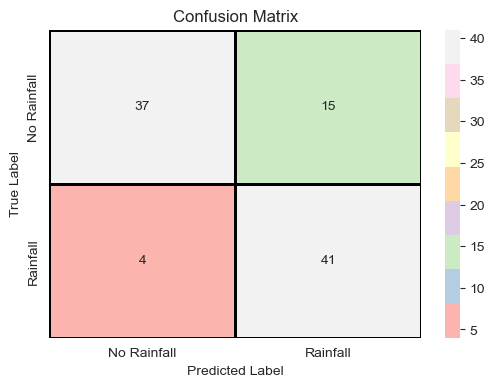

In [73]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(confusion_matrix)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Pastel1", xticklabels=["No Rainfall", "Rainfall"], yticklabels=["No Rainfall", "Rainfall"],linewidths=1, linecolor='black')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
plot_confusion_matrix(svm1, X_test, y_test)